In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [96]:
#function to convert strings to dates :)
def string_to_datetime(string):
    try:
        result = datetime.strptime(string, "%Y-%m-%d") 
    except:
        result = string      
    return result

In [97]:
h100_subcharts = pd.read_csv('hot100_radio_streaming_sales_Kpop.csv', converters={'chart_date':string_to_datetime, 
                                                                                    'chart_date_radio':string_to_datetime,
                                                                                    'chart_date_sales':string_to_datetime,
                                                                                    'chart_date_streaming':string_to_datetime})
wdss = pd.read_csv('wdss.csv', converters={'chart_date':string_to_datetime})

## standardize peak positions, take first when multiple are listed
for i, r in wdss.iterrows():
    try:
        new_pos = int(r['peak_position'])
    except:
        new_pos = int(r['peak_position'].split(' ')[0])
    wdss.at[i, 'peak_position'] = new_pos

In [35]:
h100_subcharts.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'chart_date', 'artist', 'song_title',
       'original_lyrics', 'translated_lyrics', 'peak_position', 'entry_weeks',
       'Total\nweeks', 'main_artist', 'search_title', 'english_lyrics',
       'english_count', 'total_count', 'english_percentage'],
      dtype='object')

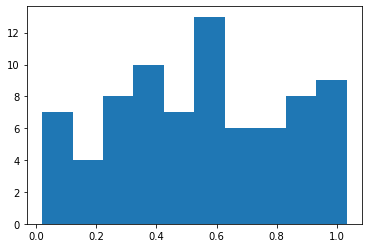

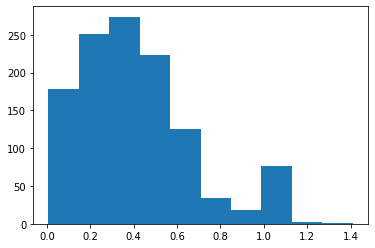

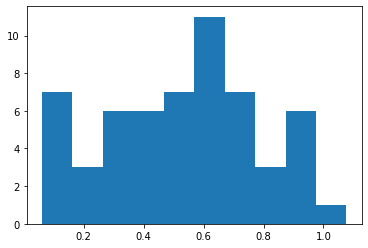

In [63]:
##compare percentage of english over time in both datasets
plt.hist(h100_subcharts['english_percentage'])
plt.show()
plt.hist(wdss.loc[wdss['peak_position'] > 1]['english_percentage'])
plt.show()
plt.hist(wdss.loc[wdss['peak_position'] <= 1]['english_percentage'])
plt.show()

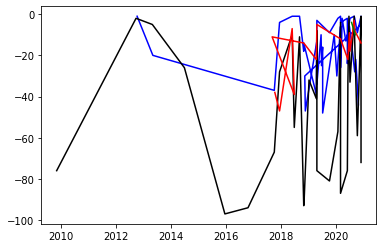

radio average % english 0.9642857142857143
streaming average % english 0.7281333730934844
sales average % english 0.5203071639240637
h100 average % english 0.6646930337256934


In [98]:
##compare billboard across streaming platforms
h100_subcharts.sort_values('chart_date', inplace=True) # sort by date

sales = h100_subcharts.loc[h100_subcharts['peak_position_sales'] > 0]
plt.plot(sales['chart_date_sales'], -1 * sales['peak_position_sales'], '-', color='blue')

h100 = h100_subcharts.loc[h100_subcharts['peak_position'] > 0]
plt.plot(h100['chart_date'], -1 * h100['peak_position'], '-', color='black')

streaming = h100_subcharts.loc[h100_subcharts['peak_position_streaming'] > 0]
plt.plot(streaming['chart_date_streaming'], -1 * streaming['peak_position_streaming'], '-', color='red')

radio = h100_subcharts.loc[h100_subcharts['peak_position_radio'] > 0]
plt.plot(radio['chart_date_radio'], -1 * radio['peak_position_radio'], '-', color='green')
plt.show()

print('radio average % english', np.mean(radio['english_percentage']))
print('streaming average % english', np.mean(streaming['english_percentage']))
print('sales average % english', np.mean(sales['english_percentage']))
print('h100 average % english', np.mean(h100['english_percentage']))

In [91]:
#only sales chart has songs that didnt appear on hot 100

2      2.0
3      5.0
7     67.0
8     28.0
9     10.0
      ... 
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
Name: peak_position, Length: 70, dtype: float64

In [92]:
h100_subcharts

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,chart_date,artist,song_title_x,Original URL,original_lyrics,English Translation URL,translated_lyrics,...,chart_date_sales,song_title_y.1,peak_position_sales,chart_weeks_sales,missing_lyrics,spotify_id,missing_lyrics_post,english_unique,total_unique,english_percentage
1,1,1,1,2009-10-31,Wonder Girls,Nobody (English release),https://genius.com/Wonder-girls-nobody-english...,You know I still love you baby And it will nev...,https://genius.com/Wonder-girls-nobody-english...,You know I still love you baby And it will nev...,...,NaN,NaN,NaN,NaN,False,0TBNg82Zqi0k1VslEe2ooq,False,119,123,1.000000
2,2,2,2,2012-09-22,Psy,Gangnam Style,https://genius.com/Psy-gangnam-style-lyrics,Hangul 오빤 강남 스타일 강남 스타일 낮에는 따사로운 인간적인 여자 커피 한잔...,https://genius.com/Genius-english-translations...,Oppa Gangnam Style Gangnam style Warm human wo...,...,2012-10-06,Gangnam Style,1.0,32,False,03UrZgTINDqvnUMbbIMhql,False,12,83,0.114391
3,3,3,3,2013-04-27,Psy,Gentleman,https://genius.com/Psy-gentleman-lyrics,알랑가몰라 왜 화끈해야 하는건지 알랑가몰라 왜 말끔해야 하는건지 알랑가몰라 아리까리...,https://lyricstranslate.com/en/gentleman-gentl...,I don’t know if you know why it needs to be ho...,...,2013-05-04,Gentleman,20.0,4,False,26spalP6x2gUAab8rwB8dQ,False,37,75,0.710660
4,4,4,4,2014-06-28,Psy feat. Snoop Dogg,Hangover,https://genius.com/Psy-hangover-lyrics,"Hangover, hangover, hangover, hangover-over-ov...",https://colorcodedlyrics.com/2014/06/psy-ssai-...,"Hangover, hangover, hangover, hangover-over-ov...",...,NaN,NaN,NaN,NaN,False,4ngypPwfcqpHBxQjJIOgvr,False,170,211,0.948603
5,5,5,5,2015-12-19,Psy feat. CL,Daddy,https://genius.com/Psy-daddy-lyrics,"I got it from my daddy Daddy I feel nice, you ...",https://lyricstranslate.com/en/daddy-daddy.html-1,"I got it from my daddy Daddy I feel nice, you ...",...,NaN,NaN,NaN,NaN,False,1eMVXXpNPEUdFRy5ZH7FpM,False,64,140,0.816239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,73,73,NaT,BTS,NaN,https://genius.com/Bts-stay-gold-lyrics,Ooh ooh In a world where you feel cold You got...,https://genius.com/Genius-english-translations...,"Oh, woah, oh In a world where you feel cold Yo...",...,2020-07-04,Stay Gold,6.0,1,True,3Ys2PYl1wyPKQIwyqhP9cQ,False,41,91,0.718919
74,74,74,74,NaT,BTS,NaN,https://genius.com/Bts-your-eyes-tell-lyrics,何故、こんなにも 涙が溢れるの ねえ、側にいて そして笑ってよ 君のいない未来は 色のない世...,https://genius.com/Genius-english-translations...,"Why are my eyes filled with tears? Hey, stay b...",...,2020-07-25,Your Eyes Tell,12.0,1,True,3TZ7NHkMT82AhwuYsd00Hz,False,16,57,0.313433
75,75,75,75,NaT,K/DA: (G)I-dle & Wolftyla feat. Bea Miller,NaN,https://genius.com/K-da-the-baddest-lyrics,Baddest do what the baddest do (Hey) The badde...,https://genius.com/Genius-english-translations...,Baddest do what the baddest do (Hey) The badde...,...,2020-09-12,The Baddest,28.0,1,True,2V4Fx72svQRxrFvNT1eq5f,False,180,220,0.903967
76,76,76,76,NaT,Max Schneider feat. Suga,NaN,https://genius.com/Max-blueberry-eyes-lyrics,"Mmm, mmm Da-da, ooh woah-oh, yeah MAX, baby Le...",https://genius.com/Genius-english-translations...,"Mmm, mmm Da-da, ooh woah-oh, yeah MAX, baby Le...",...,2020-09-26,Blueberry Eyes,22.0,1,True,5dn6QANKbf76pANGjMBida,True,87,131,0.817427
